# Figure 3
## Regional Hazard Trends

Drop linear regression lines in A and B

``Done.``

Add East Asia to all

``This is difficult given the number of regions already present. We should consider dropping a region or will need to spend time developing an appropriate set of colors to easily distinguish between the regions. We will also need to identify which AR6 sections define East Asia.``

Make a map for the supplement of the regional definitions

``See figure 3.S1``

In [1]:
import xarray
from distributed import Client
import numpy as np
import cftime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import regionmask

f_background_color = "#ffffff"
ax_background_color = "#ffffff"
grid_line_color = "#e8e8e8"
grid_line_lw = 0.8

na_color = "#1f77b4"
csa_color = "#ff7f0e"
af_color = "#2ca02c"
euro_color = "#9467bd"
sa_color = "#d62728"
oc_color = "#17becf"
au_color = "#ffbc42"
eas_color = "#8c564b"

client = Client('localhost:8786')
client

<Client: 'tcp://146.6.192.149:8786' processes=20 threads=40, memory=0.91 TiB>

In [2]:
HW_DIR = "/projects/dgs/persad_research/SIMULATION_DATA/ZARR/LENS1/HEAT_OUTPUTS/"

land_mask_path = "/projects/dgs/persad_research/SIMULATION_DATA/DATA/LENS1/CESM1/all/001/day/LANDFRAC/b.e11.B1850C5CN.f09_g16.005.cam.h0.LANDFRAC.200001-209912.nc"
land_mask = xarray.open_dataset(land_mask_path)["LANDFRAC"].mean(dim="time")

hw_mx_all_path = f"{HW_DIR}CESM1_LE_all_TREFHTMX_HW_METRICS.zarr"
hw_mx_xaer_path = f"{HW_DIR}CESM1_LE_xaer_TREFHTMX_HW_METRICS.zarr"
hw_mx_xghg_path = f"{HW_DIR}CESM1_LE_xghg_TREFHTMX_HW_METRICS.zarr"
OUTPUT_DIR = "/projects/dgs/persad_research/SIMULATION_DATA/ZARR/MERRA2/HEAT_OUTPUTS/"
hw_mx_merra_path = f"{OUTPUT_DIR}MERRA2_T2MMIN_HW_METRICS.zarr"


hw_mx_all = xarray.open_zarr(hw_mx_all_path)
hw_mx_xaer = xarray.open_zarr(hw_mx_xaer_path)
hw_mx_xghg = xarray.open_zarr(hw_mx_xghg_path)
hw_mx_merra = xarray.open_zarr(hw_mx_merra_path)

ar6_mask = regionmask.defined_regions.ar6.land.mask(hw_mx_all.lon, hw_mx_all.lat)

mask_na = ar6_mask.where(land_mask > 0).where(ar6_mask <= 6)
mask_csa = ar6_mask.where(land_mask > 0).where(ar6_mask <= 15).where(ar6_mask >= 7)
mask_af = ar6_mask.where(land_mask > 0).where(ar6_mask <= 27).where(ar6_mask >= 20)
mask_euro = ar6_mask.where(land_mask > 0).where(ar6_mask <= 19).where(ar6_mask >= 16)
mask_sa = ar6_mask.where(land_mask > 0).where(ar6_mask <= 37).where(ar6_mask >= 32)
mask_oc = ar6_mask.where(land_mask > 0).where(ar6_mask == 38)
mask_au = ar6_mask.where(land_mask > 0).where(ar6_mask <= 42).where(ar6_mask >= 39)
mask_eas = ar6_mask.where(land_mask > 0).where(ar6_mask == 35)

hw_mx_na_all_ts = hw_mx_all.sel(percentile=0.9).where(mask_na >= 0).weighted(np.cos(np.deg2rad(hw_mx_all.lat))).mean(dim=["lat", "lon"]).compute()
hw_mx_na_xaer_ts = hw_mx_xaer.sel(percentile=0.9).where(mask_na >= 0).weighted(np.cos(np.deg2rad(hw_mx_xaer.lat))).mean(dim=["lat", "lon"]).compute()
hw_mx_na_xghg_ts = hw_mx_xghg.sel(percentile=0.9).where(mask_na >= 0).weighted(np.cos(np.deg2rad(hw_mx_xghg.lat))).mean(dim=["lat", "lon"]).compute()
hw_mx_na_merra_ts = hw_mx_merra.sel(percentile=0.9).where(mask_na >= 0).weighted(np.cos(np.deg2rad(hw_mx_merra.lat))).mean(dim=["lat", "lon"]).compute()

hw_mx_csa_all_ts = hw_mx_all.sel(percentile=0.9).where(mask_csa >= 0).weighted(np.cos(np.deg2rad(hw_mx_all.lat))).mean(dim=["lat", "lon"]).compute()
hw_mx_csa_xaer_ts = hw_mx_xaer.sel(percentile=0.9).where(mask_csa >= 0).weighted(np.cos(np.deg2rad(hw_mx_xaer.lat))).mean(dim=["lat", "lon"]).compute()
hw_mx_csa_xghg_ts = hw_mx_xghg.sel(percentile=0.9).where(mask_csa >= 0).weighted(np.cos(np.deg2rad(hw_mx_xghg.lat))).mean(dim=["lat", "lon"]).compute()
hw_mx_csa_merra_ts = hw_mx_merra.sel(percentile=0.9).where(mask_csa >= 0).weighted(np.cos(np.deg2rad(hw_mx_merra.lat))).mean(dim=["lat", "lon"]).compute()

hw_mx_af_all_ts = hw_mx_all.sel(percentile=0.9).where(mask_af >= 0).weighted(np.cos(np.deg2rad(hw_mx_all.lat))).mean(dim=["lat", "lon"]).compute()
hw_mx_af_xaer_ts = hw_mx_xaer.sel(percentile=0.9).where(mask_af >= 0).weighted(np.cos(np.deg2rad(hw_mx_xaer.lat))).mean(dim=["lat", "lon"]).compute()
hw_mx_af_xghg_ts = hw_mx_xghg.sel(percentile=0.9).where(mask_af >= 0).weighted(np.cos(np.deg2rad(hw_mx_xghg.lat))).mean(dim=["lat", "lon"]).compute()
hw_mx_af_merra_ts = hw_mx_merra.sel(percentile=0.9).where(mask_af >= 0).weighted(np.cos(np.deg2rad(hw_mx_merra.lat))).mean(dim=["lat", "lon"]).compute()

hw_mx_euro_all_ts = hw_mx_all.sel(percentile=0.9).where(mask_euro >= 0).weighted(np.cos(np.deg2rad(hw_mx_all.lat))).mean(dim=["lat", "lon"]).compute()
hw_mx_euro_xaer_ts = hw_mx_xaer.sel(percentile=0.9).where(mask_euro >= 0).weighted(np.cos(np.deg2rad(hw_mx_xaer.lat))).mean(dim=["lat", "lon"]).compute()
hw_mx_euro_xghg_ts = hw_mx_xghg.sel(percentile=0.9).where(mask_euro >= 0).weighted(np.cos(np.deg2rad(hw_mx_xghg.lat))).mean(dim=["lat", "lon"]).compute()
hw_mx_euro_merra_ts = hw_mx_merra.sel(percentile=0.9).where(mask_euro >= 0).weighted(np.cos(np.deg2rad(hw_mx_merra.lat))).mean(dim=["lat", "lon"]).compute()

hw_mx_sa_all_ts = hw_mx_all.sel(percentile=0.9).where(mask_sa >= 0).weighted(np.cos(np.deg2rad(hw_mx_all.lat))).mean(dim=["lat", "lon"]).compute()
hw_mx_sa_xaer_ts = hw_mx_xaer.sel(percentile=0.9).where(mask_sa >= 0).weighted(np.cos(np.deg2rad(hw_mx_xaer.lat))).mean(dim=["lat", "lon"]).compute()
hw_mx_sa_xghg_ts = hw_mx_xghg.sel(percentile=0.9).where(mask_sa >= 0).weighted(np.cos(np.deg2rad(hw_mx_xghg.lat))).mean(dim=["lat", "lon"]).compute()
hw_mx_sa_merra_ts = hw_mx_merra.sel(percentile=0.9).where(mask_sa >= 0).weighted(np.cos(np.deg2rad(hw_mx_merra.lat))).mean(dim=["lat", "lon"]).compute()

hw_mx_oc_all_ts = hw_mx_all.sel(percentile=0.9).where(mask_oc >= 0).weighted(np.cos(np.deg2rad(hw_mx_all.lat))).mean(dim=["lat", "lon"]).compute()
hw_mx_oc_xaer_ts = hw_mx_xaer.sel(percentile=0.9).where(mask_oc >= 0).weighted(np.cos(np.deg2rad(hw_mx_xaer.lat))).mean(dim=["lat", "lon"]).compute()
hw_mx_oc_xghg_ts = hw_mx_xghg.sel(percentile=0.9).where(mask_oc >= 0).weighted(np.cos(np.deg2rad(hw_mx_xghg.lat))).mean(dim=["lat", "lon"]).compute()
hw_mx_oc_merra_ts = hw_mx_merra.sel(percentile=0.9).where(mask_oc >= 0).weighted(np.cos(np.deg2rad(hw_mx_merra.lat))).mean(dim=["lat", "lon"]).compute()

hw_mx_au_all_ts = hw_mx_all.sel(percentile=0.9).where(mask_au >= 0).weighted(np.cos(np.deg2rad(hw_mx_all.lat))).mean(dim=["lat", "lon"]).compute()
hw_mx_au_xaer_ts = hw_mx_xaer.sel(percentile=0.9).where(mask_au >= 0).weighted(np.cos(np.deg2rad(hw_mx_xaer.lat))).mean(dim=["lat", "lon"]).compute()
hw_mx_au_xghg_ts = hw_mx_xghg.sel(percentile=0.9).where(mask_au >= 0).weighted(np.cos(np.deg2rad(hw_mx_xghg.lat))).mean(dim=["lat", "lon"]).compute()
hw_mx_au_merra_ts = hw_mx_merra.sel(percentile=0.9).where(mask_au >= 0).weighted(np.cos(np.deg2rad(hw_mx_merra.lat))).mean(dim=["lat", "lon"]).compute()

hw_mx_eas_all_ts = hw_mx_all.sel(percentile=0.9).where(mask_eas >= 0).weighted(np.cos(np.deg2rad(hw_mx_all.lat))).mean(dim=["lat", "lon"]).compute()
hw_mx_eas_xaer_ts = hw_mx_xaer.sel(percentile=0.9).where(mask_eas >= 0).weighted(np.cos(np.deg2rad(hw_mx_xaer.lat))).mean(dim=["lat", "lon"]).compute()
hw_mx_eas_xghg_ts = hw_mx_xghg.sel(percentile=0.9).where(mask_eas >= 0).weighted(np.cos(np.deg2rad(hw_mx_xghg.lat))).mean(dim=["lat", "lon"]).compute()
hw_mx_eas_merra_ts = hw_mx_merra.sel(percentile=0.9).where(mask_eas >= 0).weighted(np.cos(np.deg2rad(hw_mx_merra.lat))).mean(dim=["lat", "lon"]).compute()

Text(0.5, 1.0, '(3.0) AR6-Based Regional Definitions using Legend Colors')

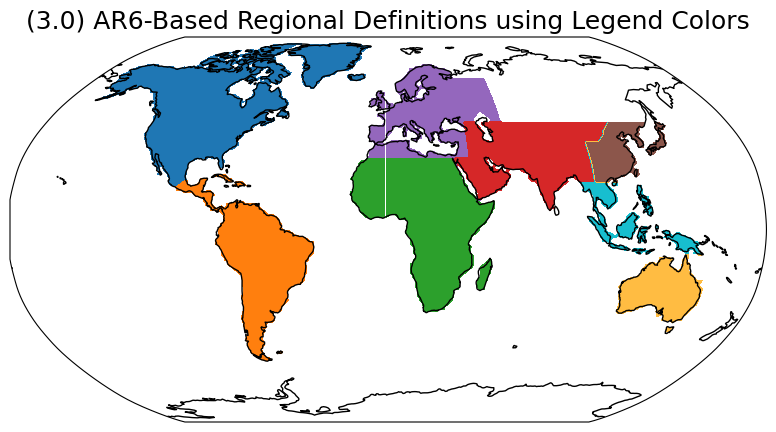

In [86]:
colors = [
    na_color,
    csa_color,
    af_color,
    euro_color,
    sa_color,
    oc_color,
    au_color,
    eas_color
]

full_mask = (mask_na*0 + 1).fillna(0) + (mask_csa*0 + 2).fillna(0) + (mask_af*0 + 3).fillna(0) + (mask_euro*0 + 4).fillna(0) + (mask_sa*0 + 5).fillna(0) + (mask_oc*0 + 6).fillna(0) + (mask_au*0 + 7).fillna(0)
full_mask -= (mask_eas*0 + 5).fillna(0)
full_mask += (mask_eas*0 + 8).fillna(0)

proj = ccrs.Robinson()
transform = ccrs.PlateCarree()
f, ax1 = plt.subplots(1, 1, figsize=(10, 5), facecolor='w', subplot_kw=dict(projection=proj))

full_mask.where(full_mask > 0).plot.contourf(ax=ax1, levels=np.arange(0.5,10), colors=colors, transform=transform, add_colorbar=False)
ax1.coastlines()
ax1.set_title("(3.0) AR6-Based Regional Definitions using Legend Colors", fontsize=18)

Text(0.5, 1.0, '(3.1MX) LENS1, Regional Land-only Mean TMAX Heatwave Frequency')

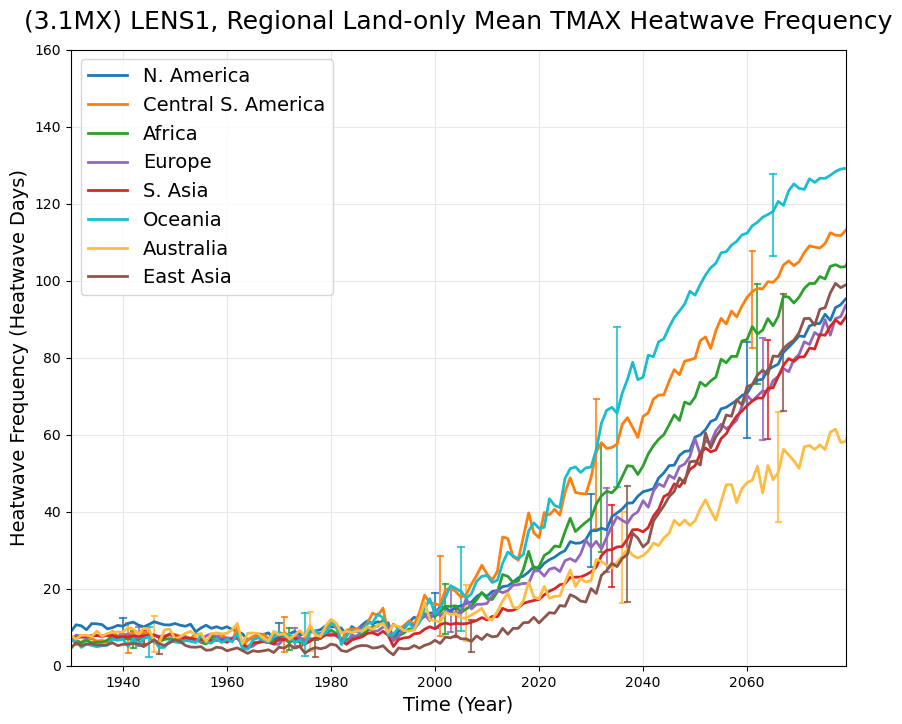

In [3]:
f, ax1 = plt.subplots(1, 1, figsize=(10, 8), facecolor='w')

f.patch.set_facecolor(f_background_color)
ax1.set_facecolor(ax_background_color)

for i in np.arange(1940, 2080, 20):
    ax1.axvline(i, color=grid_line_color, linewidth=grid_line_lw, zorder=-1)
for i in np.arange(0, 160, 20):
    ax1.axhline(i, color=grid_line_color, linewidth=grid_line_lw, zorder=-1)

pairs = [
    (hw_mx_na_all_ts["HWF"], na_color),
    (hw_mx_csa_all_ts["HWF"], csa_color),
    (hw_mx_af_all_ts["HWF"], af_color),
    (hw_mx_euro_all_ts["HWF"], euro_color),
    (hw_mx_sa_all_ts["HWF"], sa_color),
    (hw_mx_oc_all_ts["HWF"], oc_color),
    (hw_mx_au_all_ts["HWF"], au_color),
    (hw_mx_eas_all_ts["HWF"], eas_color),
]

offset = 0
for hw_dataset, color in pairs:
    for center in [1940, 1970, 2000, 2030, 2060]:
        center += offset
        whisker_width = 0.5
        alpha = 0.8

        hw_slice = hw_dataset.sel(year=slice(center - 15, center + 15)).values.flatten()
        ax1.plot([center, center],
                 [np.mean(hw_slice) - np.std(hw_slice), np.mean(hw_slice) + np.std(hw_slice)],
                 color=color, alpha=alpha)
        ax1.plot([center - whisker_width, center + whisker_width],
                 [np.mean(hw_slice) - np.std(hw_slice), np.mean(hw_slice) - np.std(hw_slice)],
                 color=color, alpha=alpha)
        ax1.plot([center - whisker_width, center + whisker_width],
                 [np.mean(hw_slice) + np.std(hw_slice), np.mean(hw_slice) + np.std(hw_slice)],
                 color=color, alpha=alpha)
    offset += 1

lw = 2
hw_mx_na_all_ts["HWF"].mean(dim="member").plot(ax=ax1, color=na_color, linewidth=lw, label="N. America")
hw_mx_csa_all_ts["HWF"].mean(dim="member").plot(ax=ax1, color=csa_color, linewidth=lw, label="Central S. America")
hw_mx_af_all_ts["HWF"].mean(dim="member").plot(ax=ax1, color=af_color, linewidth=lw, label="Africa")
hw_mx_euro_all_ts["HWF"].mean(dim="member").plot(ax=ax1, color=euro_color, linewidth=lw, label="Europe")
hw_mx_sa_all_ts["HWF"].mean(dim="member").plot(ax=ax1, color=sa_color, linewidth=lw, label="S. Asia")
hw_mx_oc_all_ts["HWF"].mean(dim="member").plot(ax=ax1, color=oc_color, linewidth=lw, label="Oceania")
hw_mx_au_all_ts["HWF"].mean(dim="member").plot(ax=ax1, color=au_color, linewidth=lw, label="Australia")
hw_mx_eas_all_ts["HWF"].mean(dim="member").plot(ax=ax1, color=eas_color, linewidth=lw, label="East Asia")

ax1.set_xlim(1930, 2079)
ax1.set_ylim(0, 160)

fz = 14
ax1.set_ylabel("Heatwave Frequency (Heatwave Days)", fontsize=fz)
ax1.set_xlabel("Time (Year)", fontsize=fz)
ax1.legend(loc="upper left", fontsize=fz)
ax1.set_title("(3.1MX) LENS1, Regional Land-only Mean TMAX Heatwave Frequency", fontsize=18, pad=15)

Text(0.5, 1.0, '(3.2MX) LENS1, Regional Land-only Change in Mean TMAX Heatwave Frequency due to AER')

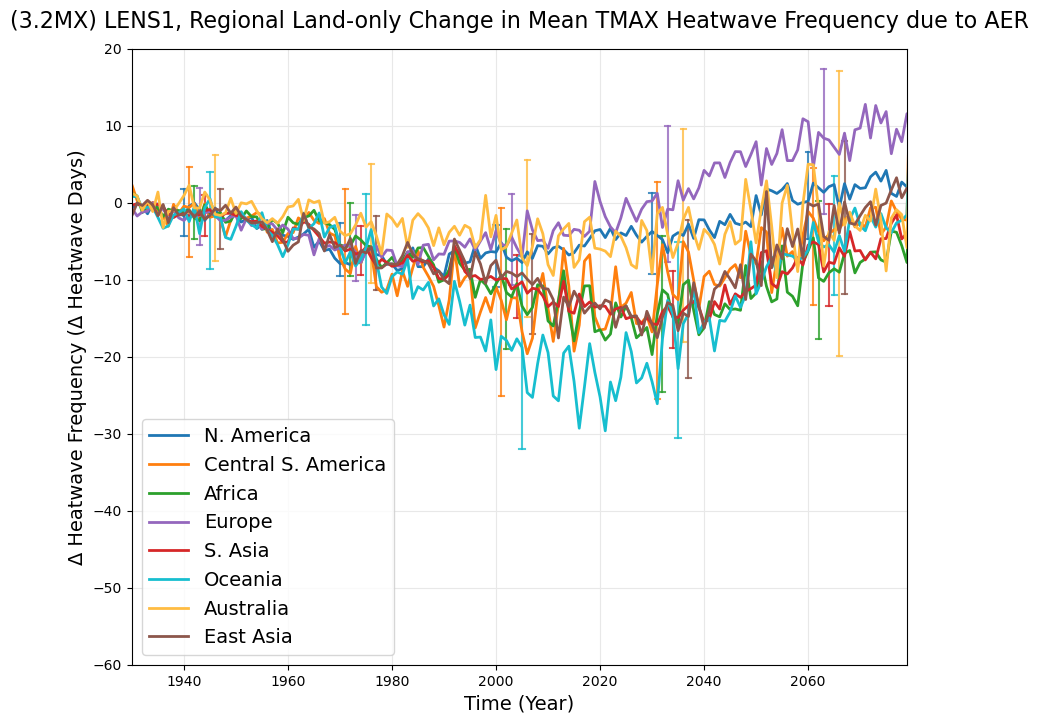

In [4]:
f, ax1 = plt.subplots(1, 1, figsize=(10, 8), facecolor='w')

f.patch.set_facecolor(f_background_color)
ax1.set_facecolor(ax_background_color)

for i in np.arange(1940, 2080, 20):
    ax1.axvline(i, color=grid_line_color, linewidth=grid_line_lw, zorder=-1)
for i in np.arange(-60, 20, 10):
    ax1.axhline(i, color=grid_line_color, linewidth=grid_line_lw, zorder=-1)

pairs = [
    (hw_mx_na_all_ts["HWF"] - hw_mx_na_xaer_ts["HWF"], na_color),
    (hw_mx_csa_all_ts["HWF"] - hw_mx_csa_xaer_ts["HWF"], csa_color),
    (hw_mx_af_all_ts["HWF"] - hw_mx_af_xaer_ts["HWF"], af_color),
    (hw_mx_euro_all_ts["HWF"] - hw_mx_euro_xaer_ts["HWF"], euro_color),
    (hw_mx_sa_all_ts["HWF"] - hw_mx_sa_xaer_ts["HWF"], sa_color),
    (hw_mx_oc_all_ts["HWF"] - hw_mx_oc_xaer_ts["HWF"], oc_color),
    (hw_mx_au_all_ts["HWF"] - hw_mx_au_xaer_ts["HWF"], au_color),
    (hw_mx_eas_all_ts["HWF"] - hw_mx_eas_xaer_ts["HWF"], eas_color),
]

offset = 0
for hw_dataset, color in pairs:
    for center in [1940, 1970, 2000, 2030, 2060]:
        center += offset
        whisker_width = 0.5
        alpha = 0.8

        hw_slice = hw_dataset.sel(year=slice(center - 15, center + 15)).values.flatten()
        ax1.plot([center, center],
                 [np.mean(hw_slice) - np.std(hw_slice), np.mean(hw_slice) + np.std(hw_slice)],
                 color=color, alpha=alpha)
        ax1.plot([center - whisker_width, center + whisker_width],
                 [np.mean(hw_slice) - np.std(hw_slice), np.mean(hw_slice) - np.std(hw_slice)],
                 color=color, alpha=alpha)
        ax1.plot([center - whisker_width, center + whisker_width],
                 [np.mean(hw_slice) + np.std(hw_slice), np.mean(hw_slice) + np.std(hw_slice)],
                 color=color, alpha=alpha)
    offset += 1

lw = 2
(hw_mx_na_all_ts["HWF"] - hw_mx_na_xaer_ts["HWF"]).mean(dim="member").plot(ax=ax1, color=na_color, linewidth=lw, label="N. America")
(hw_mx_csa_all_ts["HWF"] - hw_mx_csa_xaer_ts["HWF"]).mean(dim="member").plot(ax=ax1, color=csa_color, linewidth=lw, label="Central S. America")
(hw_mx_af_all_ts["HWF"] - hw_mx_af_xaer_ts["HWF"]).mean(dim="member").plot(ax=ax1, color=af_color, linewidth=lw, label="Africa")
(hw_mx_euro_all_ts["HWF"] - hw_mx_euro_xaer_ts["HWF"]).mean(dim="member").plot(ax=ax1, color=euro_color, linewidth=lw, label="Europe")
(hw_mx_sa_all_ts["HWF"] - hw_mx_sa_xaer_ts["HWF"]).mean(dim="member").plot(ax=ax1, color=sa_color, linewidth=lw, label="S. Asia")
(hw_mx_oc_all_ts["HWF"] - hw_mx_oc_xaer_ts["HWF"]).mean(dim="member").plot(ax=ax1, color=oc_color, linewidth=lw, label="Oceania")
(hw_mx_au_all_ts["HWF"] - hw_mx_au_xaer_ts["HWF"]).mean(dim="member").plot(ax=ax1, color=au_color, linewidth=lw, label="Australia")
(hw_mx_eas_all_ts["HWF"] - hw_mx_eas_xaer_ts["HWF"]).mean(dim="member").plot(ax=ax1, color=eas_color, linewidth=lw, label="East Asia")

ax1.set_xlim(1930, 2079)
ax1.set_ylim(-60, 20)

fz = 14
ax1.set_ylabel("Δ Heatwave Frequency (Δ Heatwave Days)", fontsize=fz)
ax1.set_xlabel("Time (Year)", fontsize=fz)
ax1.legend(loc="lower left", fontsize=fz)
ax1.set_title("(3.2MX) LENS1, Regional Land-only Change in Mean TMAX Heatwave Frequency due to AER", fontsize=16, pad=15)

Text(0.5, 1.0, '(3.3MX) LENS1, Regional Land-only Mean TMAX Heatwave Duration')

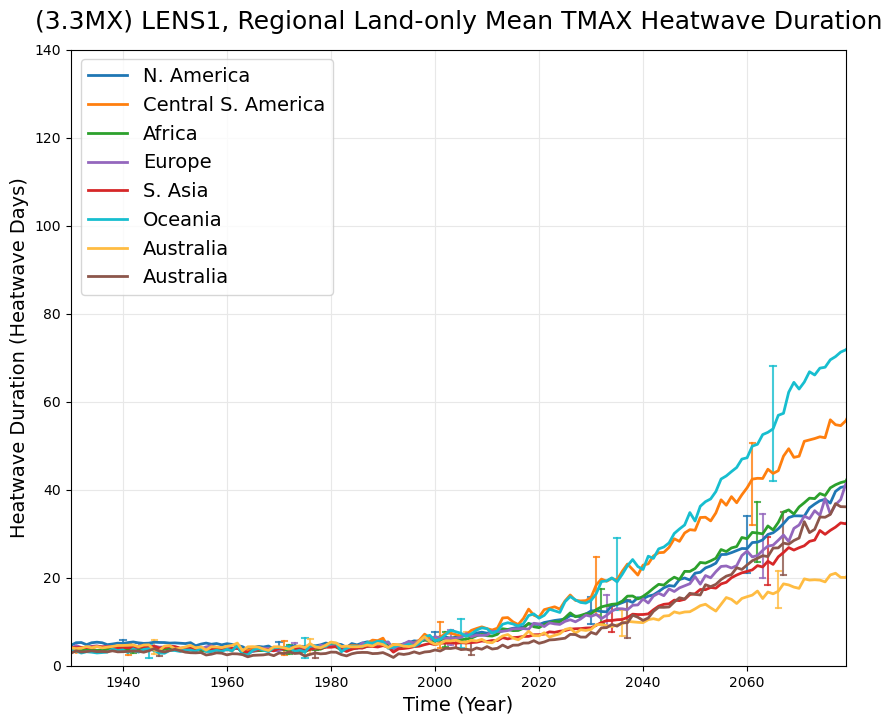

In [5]:
f, ax1 = plt.subplots(1, 1, figsize=(10, 8), facecolor='w')

f.patch.set_facecolor(f_background_color)
ax1.set_facecolor(ax_background_color)

for i in np.arange(1940, 2080, 20):
    ax1.axvline(i, color=grid_line_color, linewidth=grid_line_lw, zorder=-1)
for i in np.arange(0, 160, 20):
    ax1.axhline(i, color=grid_line_color, linewidth=grid_line_lw, zorder=-1)

pairs = [
    (hw_mx_na_all_ts["HWD"], na_color),
    (hw_mx_csa_all_ts["HWD"], csa_color),
    (hw_mx_af_all_ts["HWD"], af_color),
    (hw_mx_euro_all_ts["HWD"], euro_color),
    (hw_mx_sa_all_ts["HWD"], sa_color),
    (hw_mx_oc_all_ts["HWD"], oc_color),
    (hw_mx_au_all_ts["HWD"], au_color),
    (hw_mx_eas_all_ts["HWD"], eas_color),
]

offset = 0
for hw_dataset, color in pairs:
    for center in [1940, 1970, 2000, 2030, 2060]:
        center += offset
        whisker_width = 0.5
        alpha = 0.8

        hw_slice = hw_dataset.sel(year=slice(center - 15, center + 15)).values.flatten()
        ax1.plot([center, center],
                 [np.mean(hw_slice) - np.std(hw_slice), np.mean(hw_slice) + np.std(hw_slice)],
                 color=color, alpha=alpha)
        ax1.plot([center - whisker_width, center + whisker_width],
                 [np.mean(hw_slice) - np.std(hw_slice), np.mean(hw_slice) - np.std(hw_slice)],
                 color=color, alpha=alpha)
        ax1.plot([center - whisker_width, center + whisker_width],
                 [np.mean(hw_slice) + np.std(hw_slice), np.mean(hw_slice) + np.std(hw_slice)],
                 color=color, alpha=alpha)
    offset += 1

lw = 2
hw_mx_na_all_ts["HWD"].mean(dim="member").plot(ax=ax1, color=na_color, linewidth=lw, label="N. America")
hw_mx_csa_all_ts["HWD"].mean(dim="member").plot(ax=ax1, color=csa_color, linewidth=lw, label="Central S. America")
hw_mx_af_all_ts["HWD"].mean(dim="member").plot(ax=ax1, color=af_color, linewidth=lw, label="Africa")
hw_mx_euro_all_ts["HWD"].mean(dim="member").plot(ax=ax1, color=euro_color, linewidth=lw, label="Europe")
hw_mx_sa_all_ts["HWD"].mean(dim="member").plot(ax=ax1, color=sa_color, linewidth=lw, label="S. Asia")
hw_mx_oc_all_ts["HWD"].mean(dim="member").plot(ax=ax1, color=oc_color, linewidth=lw, label="Oceania")
hw_mx_au_all_ts["HWD"].mean(dim="member").plot(ax=ax1, color=au_color, linewidth=lw, label="Australia")
hw_mx_eas_all_ts["HWD"].mean(dim="member").plot(ax=ax1, color=eas_color, linewidth=lw, label="Australia")

ax1.set_xlim(1930, 2079)
ax1.set_ylim(0, 140)

fz = 14
ax1.set_ylabel("Heatwave Duration (Heatwave Days)", fontsize=fz)
ax1.set_xlabel("Time (Year)", fontsize=fz)
ax1.legend(loc="upper left", fontsize=fz)
ax1.set_title("(3.3MX) LENS1, Regional Land-only Mean TMAX Heatwave Duration", fontsize=18, pad=15)

Text(0.5, 1.0, '(3.4MX) LENS1, Regional Land-only Change in Mean TMAX Heatwave Duration due to AER')

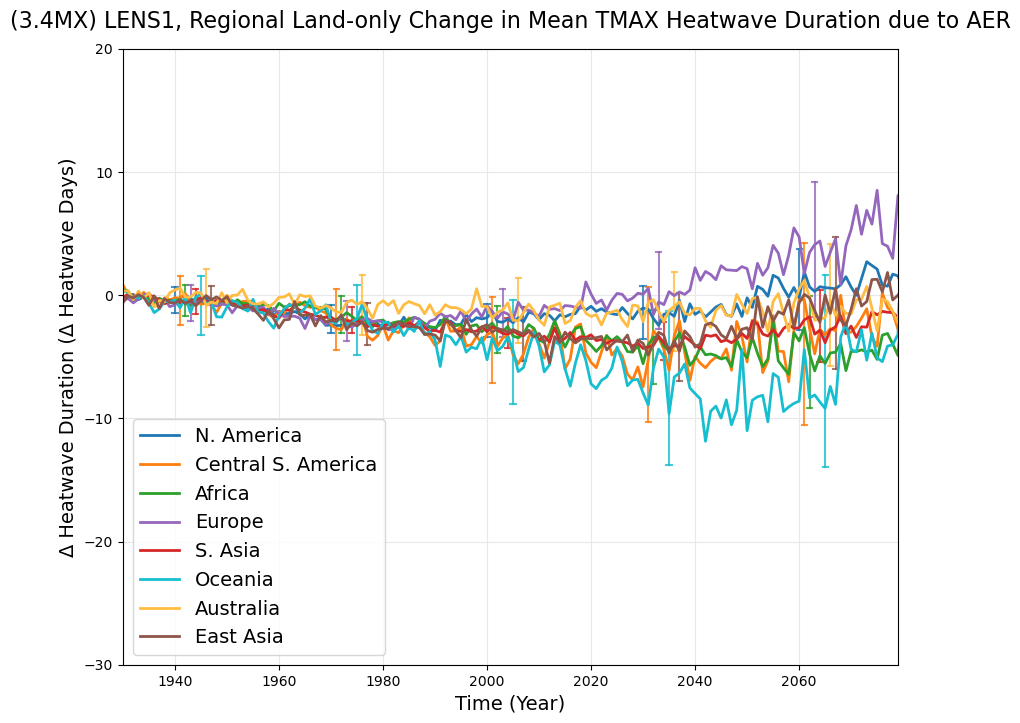

In [6]:
f, ax1 = plt.subplots(1, 1, figsize=(10, 8), facecolor='w')

f.patch.set_facecolor(f_background_color)
ax1.set_facecolor(ax_background_color)

for i in np.arange(1940, 2080, 20):
    ax1.axvline(i, color=grid_line_color, linewidth=grid_line_lw, zorder=-1)
for i in np.arange(-60, 20, 10):
    ax1.axhline(i, color=grid_line_color, linewidth=grid_line_lw, zorder=-1)

pairs = [
    (hw_mx_na_all_ts["HWD"] - hw_mx_na_xaer_ts["HWD"], na_color),
    (hw_mx_csa_all_ts["HWD"] - hw_mx_csa_xaer_ts["HWD"], csa_color),
    (hw_mx_af_all_ts["HWD"] - hw_mx_af_xaer_ts["HWD"], af_color),
    (hw_mx_euro_all_ts["HWD"] - hw_mx_euro_xaer_ts["HWD"], euro_color),
    (hw_mx_sa_all_ts["HWD"] - hw_mx_sa_xaer_ts["HWD"], sa_color),
    (hw_mx_oc_all_ts["HWD"] - hw_mx_oc_xaer_ts["HWD"], oc_color),
    (hw_mx_au_all_ts["HWD"] - hw_mx_au_xaer_ts["HWD"], au_color),
    (hw_mx_eas_all_ts["HWD"] - hw_mx_eas_xaer_ts["HWD"], eas_color),
]

offset = 0
for hw_dataset, color in pairs:
    for center in [1940, 1970, 2000, 2030, 2060]:
        center += offset
        whisker_width = 0.5
        alpha = 0.8

        hw_slice = hw_dataset.sel(year=slice(center - 15, center + 15)).values.flatten()
        ax1.plot([center, center],
                 [np.mean(hw_slice) - np.std(hw_slice), np.mean(hw_slice) + np.std(hw_slice)],
                 color=color, alpha=alpha)
        ax1.plot([center - whisker_width, center + whisker_width],
                 [np.mean(hw_slice) - np.std(hw_slice), np.mean(hw_slice) - np.std(hw_slice)],
                 color=color, alpha=alpha)
        ax1.plot([center - whisker_width, center + whisker_width],
                 [np.mean(hw_slice) + np.std(hw_slice), np.mean(hw_slice) + np.std(hw_slice)],
                 color=color, alpha=alpha)
    offset += 1

lw = 2
(hw_mx_na_all_ts["HWD"] - hw_mx_na_xaer_ts["HWD"]).mean(dim="member").plot(ax=ax1, color=na_color, linewidth=lw, label="N. America")
(hw_mx_csa_all_ts["HWD"] - hw_mx_csa_xaer_ts["HWD"]).mean(dim="member").plot(ax=ax1, color=csa_color, linewidth=lw, label="Central S. America")
(hw_mx_af_all_ts["HWD"] - hw_mx_af_xaer_ts["HWD"]).mean(dim="member").plot(ax=ax1, color=af_color, linewidth=lw, label="Africa")
(hw_mx_euro_all_ts["HWD"] - hw_mx_euro_xaer_ts["HWD"]).mean(dim="member").plot(ax=ax1, color=euro_color, linewidth=lw, label="Europe")
(hw_mx_sa_all_ts["HWD"] - hw_mx_sa_xaer_ts["HWD"]).mean(dim="member").plot(ax=ax1, color=sa_color, linewidth=lw, label="S. Asia")
(hw_mx_oc_all_ts["HWD"] - hw_mx_oc_xaer_ts["HWD"]).mean(dim="member").plot(ax=ax1, color=oc_color, linewidth=lw, label="Oceania")
(hw_mx_au_all_ts["HWD"] - hw_mx_au_xaer_ts["HWD"]).mean(dim="member").plot(ax=ax1, color=au_color, linewidth=lw, label="Australia")
(hw_mx_eas_all_ts["HWD"] - hw_mx_eas_xaer_ts["HWD"]).mean(dim="member").plot(ax=ax1, color=eas_color, linewidth=lw, label="East Asia")

ax1.set_xlim(1930, 2079)
ax1.set_ylim(-30, 20)

fz = 14
ax1.set_ylabel("Δ Heatwave Duration (Δ Heatwave Days)", fontsize=fz)
ax1.set_xlabel("Time (Year)", fontsize=fz)
ax1.legend(loc="lower left", fontsize=fz)
ax1.set_title("(3.4MX) LENS1, Regional Land-only Change in Mean TMAX Heatwave Duration due to AER", fontsize=16, pad=15)